In [0]:
from google.colab import files

In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreeyash6199","key":"fa0ace82f613ab882fd3fb0b94916db0"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

>Now download kaggle dataset.

In [0]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98%|███████████████████████████████████████ | 265M/271M [00:04<00:00, 52.9MB/s]
100%|████████████████████████████████████████| 271M/271M [00:04<00:00, 58.3MB/s]
 97%|██████████████████████████████████████▉ | 529M/544M [00:08<00:00, 75.3MB/s]
100%|████████████████████████████████████████| 544M/544M [00:08<00:00, 64.1MB/s]
  0%|                                                | 0.00/111k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 111k/111k [00:00<00:00, 55.9MB/s]


In [3]:
!ls

datalab  kaggle.json  sample_submission.csv  test  train




*   import all required libraries 
*   we will use tensorflow layers framework.



In [0]:
import os
import cv2
import random
import numpy
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline



> **Preprocessing Images**

> >resizing images to shape (100,100,3) and then storing dataset into a numpy array. OpenCV is used for basic processing on images.



In [0]:
images = []
labels = []

for img in os.listdir('train/'):
    path = "train/" + str(img) 
    image = cv2.imread(str(path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(100,100))
    images.append(image)
    if img[:3] == "cat":                  # cat >> 0
        labels.append(int(0))
    elif img[:3] == "dog":                # dog >> 1
        labels.append(int(1))

images = numpy.array(images)
labels = numpy.array(labels)        

> > Note that here I am reshaping y_train and y_test array to [-1,1] because it will convert its shape from (?, ) to (?, 1). It will reduce future errors. 

In [20]:
import sklearn.cross_validation
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(images, labels, test_size=0.05)
y_train = numpy.asarray(y_train, dtype = 'int')
y_train = numpy.reshape(y_train,[-1,1])
y_test = numpy.reshape(y_test,[-1,1])
y_train.shape

(23750, 1)

1

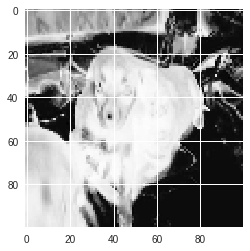

In [7]:
gray = cv2.cvtColor(X_test[1], cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
y_test[1]

In [0]:
X = tf.placeholder(tf.float32, shape = [None, 100, 100, 3], name = 'X')
y = tf.placeholder(tf.float32, shape = [None, 1], name = 'y')

In [0]:
conv1 = tf.layers.conv2d(inputs = X, name = 'conv1', padding = 'same', strides=1, activation='relu', filters = 16, kernel_size = 3)
max_pool_1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=2, strides = 2, padding= 'valid')
conv2 = tf.layers.conv2d(inputs = max_pool_1, name = 'conv2', padding = 'same', strides=1, activation='relu', filters = 32, kernel_size = 3)
max_pool_2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=2, strides = 2, padding= 'valid')
dropout = tf.layers.dropout(inputs= max_pool_2, rate = 0.5)
flatten = tf.contrib.layers.flatten(inputs = dropout)
dense1 = tf.layers.dense(inputs = flatten, name = 'dense1', activation = tf.nn.relu, units = 128)
dense2 = tf.layers.dense(inputs = dense1, name = 'final', activation = None, units = 1)

In [10]:
for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES):
    print(var)

<tf.Variable 'conv1/kernel:0' shape=(3, 3, 3, 16) dtype=float32_ref>
<tf.Variable 'conv1/bias:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'conv2/kernel:0' shape=(3, 3, 16, 32) dtype=float32_ref>
<tf.Variable 'conv2/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'dense1/kernel:0' shape=(20000, 128) dtype=float32_ref>
<tf.Variable 'dense1/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'final/kernel:0' shape=(128, 1) dtype=float32_ref>
<tf.Variable 'final/bias:0' shape=(1,) dtype=float32_ref>


In [0]:
logits = dense2

In [0]:
y_pred = tf.nn.sigmoid(logits)

In [0]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [0]:
y_pred = tf.cast(y_pred, tf.float32)>0.5
z = y==1
    
accuracy = tf.reduce_mean(tf.cast(tf.equal(y_pred,z), tf.float32))

In [25]:
epochs = 10
array1 = []   # for train accuracy
array2 = []   # for test accuracy
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(epochs):
    for i in range(0,23500,128):
      _, train_acc = sess.run([optimizer, accuracy], feed_dict= {X: X_train[i:i+128], y: y_train[i:i+128]})
      test_acc = sess.run(accuracy, feed_dict = {X: X_test, y: y_test})
      array1.append(train_acc)
      array2.append(test_acc)
    print("Epoch : ",epoch, " , train_accuracy : ", train_acc, " , test_accuracy : ", test_acc)
    
    

Epoch :  0  , train_accuracy :  0.546875  , test_accuracy :  0.4656
Epoch :  1  , train_accuracy :  0.7421875  , test_accuracy :  0.684
Epoch :  2  , train_accuracy :  0.6640625  , test_accuracy :  0.6432
Epoch :  3  , train_accuracy :  0.609375  , test_accuracy :  0.5864
Epoch :  4  , train_accuracy :  0.53125  , test_accuracy :  0.5208
Epoch :  5  , train_accuracy :  0.53125  , test_accuracy :  0.5336
Epoch :  6  , train_accuracy :  0.484375  , test_accuracy :  0.4208
Epoch :  7  , train_accuracy :  0.4765625  , test_accuracy :  0.4192
Epoch :  8  , train_accuracy :  0.46875  , test_accuracy :  0.4272
Epoch :  9  , train_accuracy :  0.4609375  , test_accuracy :  0.4288


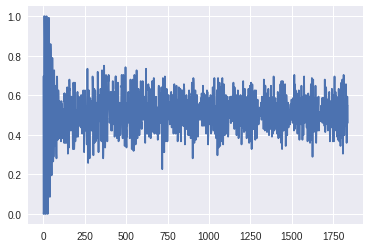

In [27]:
plt.plot(array1)
plt.show()

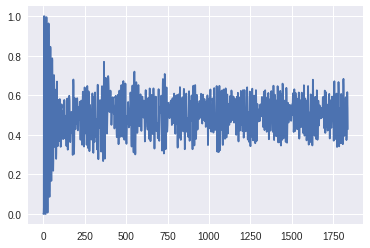

In [28]:
plt.plot(array2)
plt.show()